# Solution for Homework 10

In this assignment, we're working with SQL. In particular, we'll be working with the SAKILA database. This database contains transactions from a fictional chain of DVD rental stores. You can find the files you need to install the SAKILA database [here](https://dev.mysql.com/doc/index-other.html). Click on the `zip` option for the SAKILA database. Unzip the directory you downloaded. 

To create the database on the MySQL server on your machine:

1. Save the files `sakila-schema.sql` and `sakila-data.sql` from the unzipped directory under some path on your machine, say under "MyPath/sakila-schema.sql"
2. Log on to MySQL as root and run the following commands (I'm assuming that 'user' is an existing user that you have previously created). 

```
CREATE DATABASE Sakila;
GRANT ALL PRIVILEGES ON Sakila.* to 'user'@'localhost';
USE Sakila;
SOURCE MyPath/sakila-schema.sql;
SOURCE MyPath/sakila-data.sql;
QUIT;
```

3. Then log on as the user and change the database to Sakila. 

```
USE Sakila;
```

You can find an ER-schema of the Sakila database on Canvas. 

For some of the problems below you are asked to show the SQL code which you would run in order to find the answer to a specific question. You can show both the SQL code and your answer to the question in a Markdown cell. Note, that you should be able to write down the SQL code, even if you were not able to install MySQL or the Sakila database on your machine. You *do not* have to include the output you get from MySQL for these types of questions. 

**Example Question:** How many different languages can you find in the `language` table? 

**Example Answer:**

SQL code: 
```SELECT * from language;``` 

Answer: 6 different languages. 

For other problems, you will be asked to obtain data and then do something with those data in python. You will only be able to complete these problems, if you were able to install MySQL and download the Sakila database. If you still need help with installing MySQL, ask me as soon as possible. I will not be available for "tech help" on the day this homework is due. 

### Problem 1

Describe the `Rental` table. How many columns does that table have? How many entries are in the table? What is the primary key of the `Rental` table? How is it generated? 

SQL Code: ```DESC Rental;``` and ```SELECT * FROM Rental;```

Answer: There are 7 variables (columns) and 16,045 rows (different rental transactions). The primary key is `rental_id`.  It is automatically generated with the auto-increment procedure. 

The data types of the ten columns are listed below. 


| Field        | Type                  | Null | Key | Default           | Extra                                         |
|---|---|---|---|---|---|
| rental_id    | int(11)               | NO   | PRI | NULL              | auto_increment                                |
| rental_date  | datetime              | NO   | MUL | NULL              |                                               |
| inventory_id | mediumint(8) unsigned | NO   | MUL | NULL              |                                               |
| customer_id  | smallint(5) unsigned  | NO   | MUL | NULL              |                                               |
| return_date  | datetime              | YES  |     | NULL              |                                               |
| staff_id     | tinyint(3) unsigned   | NO   | MUL | NULL              |                                               |
| last_update  | timestamp             | NO   |     | CURRENT_TIMESTAMP | DEFAULT_GENERATED on update CURRENT_TIMESTAMP |



### Problem 2

What are the variable types of the variables `staff_id`, `customer_id`, and `rental_id` in the `Rental` table, respectively? Why is it useful or necessary to use these different variable types for these three variables? Why can't they all be stored as tinyint's for example? 

The variable types of `staff_id`, `customer_id`, and `rental_id` are tinyint, smallint, and int. They differ by how large the integer values can be that can be stored under these variables. There are only two different "employees" in this fake database (staff_id 1 and 2) and hence we can get away with tiny integers. However, there are 599 customers (which is more than the max of 255 which can be stored in a tinyint format). And there are a little over 16k rental transactions. While the latter would have (just barely) fitted in mediumint format, the int-format gives the database room to "grow" and record future transactions. 

### Problem 3

Provide the SQL code with which you would update the `Actor` table with a new row that has your own first and last name. The command for today's date in SQL is `NOW()`. 

Then provide the SQL code with which you would remove all rows with your name (first and last) from the actors table. 

SQL code:

```
INSERT INTO actor  
    (actor_id, first_name, last_name, last_update) 
    VALUES (null, 'Martina', 'Bremer', NOW());

DELETE FROM actor
WHERE first_name='Martina' AND last_name = 'Bremer';
```


### Problem 4

(a) Use Python to extract the columns `staff_id`, `amount`, and `payment_date` from the `Payment` table. 
Store these data in a Pandas data frame and display the data frame to the console for the grader to see.

In [104]:
import mysql.connector
import pandas as pd

cnx = mysql.connector.connect(user='Martina', database='Sakila', 
                              host='localhost' ,password = 'password')  # connect with config-user details
cursor = cnx.cursor()                   

cursor.execute("""SELECT staff_id, amount, payment_date FROM Payment ORDER BY payment_date""")    
        # extract three columns from payment table
        # Note, the ordering by date is not mandatory...

results = cursor.fetchall()             # fetching the description of the person table

df = pd.DataFrame(results, columns = ['staff', 'amount', 'date'])

cursor.close() 
cnx.close()

df

,staff,amount,date
0,1,2.99,2005-05-24 22:53:30
1,2,2.99,2005-05-24 22:54:33
2,2,3.99,2005-05-24 23:03:39
3,1,4.99,2005-05-24 23:04:41
4,1,6.99,2005-05-24 23:05:21
...,...,...,...
16044,1,0.99,2006-02-14 15:16:03
16045,2,2.99,2006-02-14 15:16:03
16046,2,0.99,2006-02-14 15:16:03
16047,1,0.99,2006-02-14 15:16:03


(b) For the dataframe created in (a), take the date values and use either string formating or the `pd.DatetimeIndex()` method  to extract just the month and the year of the transaction. Store both in separate columns of the data frame. 

Use groupby to find the total monthly transaction amounts, separately for each employee. 

Use Matplotlib to create a line-plot that shows the total transaction amount per employee per month as a function of time. Label the x-axis with the appropriate month/year combination and include one line per employee. Include a legend to indicate which line belongs to which employee. You can find an image on Canvas with an example of what your graph should look like. 

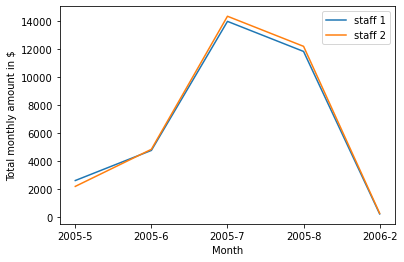

In [105]:
import matplotlib.pyplot as plt

df_new = df.copy()

df_new['Month'] = pd.DatetimeIndex(df_new['date']).month
df_new['Year'] = pd.DatetimeIndex(df_new['date']).year

df_new.drop(['date'], axis = 1)

df_new = df_new.groupby(['Year', 'Month', 'staff']).sum().unstack(-1)
df_new.reset_index(inplace = True)

df_new['date'] = df_new.Year.astype(str) + "-" + df_new.Month.astype(str)

fig, ax = plt.subplots()
for staff in range(1,3):
    ax.plot(df_new.date, df_new.amount[staff], label = "staff " + str(staff))
    
ax.set_ylabel("Total monthly amount in \$")
ax.set_xlabel("Month")
ax.legend(); 

#fig.savefig('Sakila_lineplot.png')